In [1]:
import tensorflow as tf
#model_paths = ['results\samuel\MobileNetV2_MC_AddTranspose\model.tf','results\samuel\MobileNetV2_MC_AddUpsampling\model.tf','results\samuel\MobileNetV2_MC_AddDropout\model.tf','results\samuel\MobileNetV2_MC_KerasModel\model.tf']
#model_paths = ['results\samuel\MobileNetV2_SC_AddTranspose\model.tf','results\samuel\MobileNetV2_SC_AddUpsampling\model.tf','results\samuel\MobileNetV2_SC_AddDropout\model.tf','results\samuel\MobileNetV2_SC_KerasModel\model.tf']
#model_paths = ['results\samuel\ResNet50V2_nS_MC_100epochs\model.tf']
model_paths = ['results\samuel\ResNet50V2_nS_SC_100epochs\model.tf']
#model_paths = ['results\julian\vgg16_6\model.tf']
#model_paths = ['results\julian\vgg16_7\model.tf']
#model_paths = [r'results\lena\mobilenetV2\oneLabel\withoutShift\noEarlyStopping\standard\model.tf']
#model_paths = [r'results\lena\mobilenetV2\multiLabel\withoutShift\noEarlyStopping_epochs100_validationSplit0-1\model.tf']
from load_data import CustomDataGenerator
import time
from matplotlib.pyplot import savefig

In [12]:
#DATA GENERATOR
img_dir = "PredImages/"
mask_dir = "PredLabels/"
image_extension = ".png"
mask_extension = ".png"
batch_size=3
horizontal_split = 12 #1
vertical_split = 1

seed = 42
onelabel = True
shift = False
single_img = False

#PREPROCESS FUNCTION OF THE PRETRAINED ENCODER
#from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as preprocess
from tensorflow.keras.applications.resnet_v2 import preprocess_input as preprocess
#from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess
preprocess_fcn = preprocess

train, validation = CustomDataGenerator.generate_data(batch_size, img_dir, mask_dir,horizontal_split, vertical_split, image_extension, mask_extension, 
                                                        preprocess_fcn, validation_split=0.1, flip=True, shift = shift, onelabel=onelabel, seed=seed, single_img=False)
images, masks = train.__getitem__(8)

Number of samples:  216
Classes: [0 1]
Number of samples:  24
Classes: [0 1]


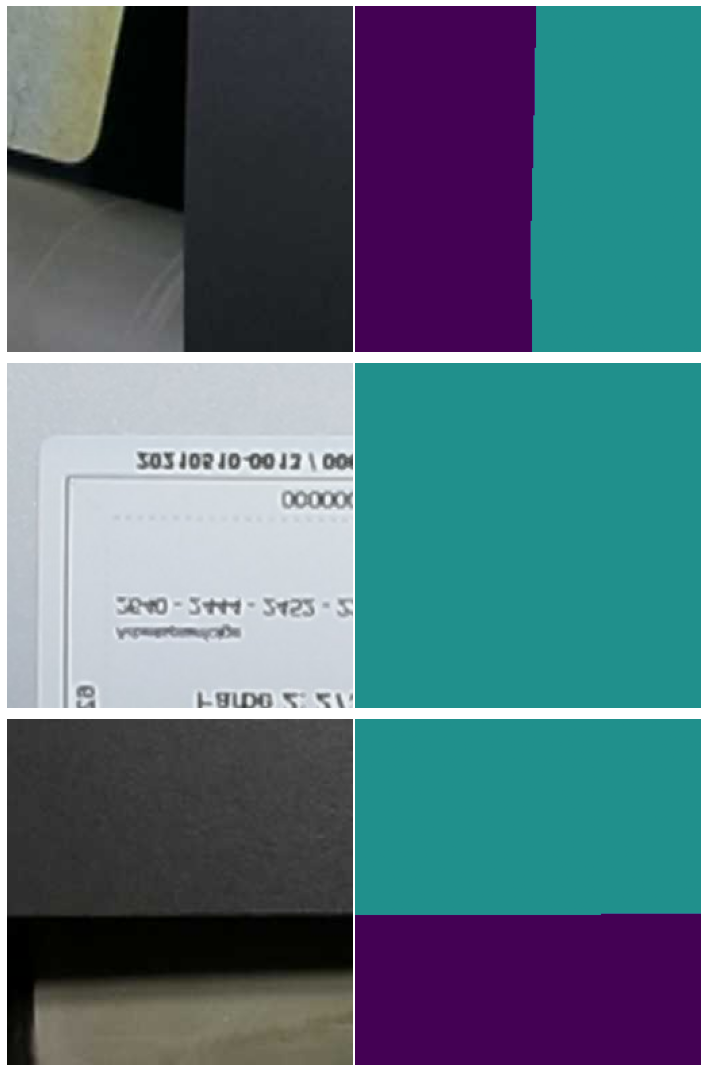

In [19]:
#Find a meaningful batch with difficult examples (best: no complete full or empty masks)
#in 6er batches: batch 2,4,6,7,8
#in 3er batches: batch 4,7,8!(MC)
train.plot_batch(8)

In [4]:
# model_AddTranspose = tf.keras.models.load_model(model_paths[0])
# model_AddUpsampling = tf.keras.models.load_model(model_paths[1])
# model_AddDropout = tf.keras.models.load_model(model_paths[2])
# model_KerasModel = tf.keras.models.load_model(model_paths[3])

model = tf.keras.models.load_model(model_paths[0])

In [13]:
# T1 = time.time()
# preds_AddTranspose = model_AddTranspose.predict(x=images, verbose=1)
# T2 = time.time()
# preds_AddUpsampling = model_AddUpsampling.predict(x=images, verbose=1)
# T3 = time.time()
# preds_AddDropout = model_AddDropout.predict(x=images, verbose=1)
# T4 = time.time()
# preds_KerasModel = model_KerasModel.predict(x=images, verbose=1)
# T5 = time.time()
# print("Time for AddTranspose: "+str(round(T2-T1,3))+" sec. \n")
# print("Time for AddUpsampling: "+str(round(T3-T2,3))+" sec. \n")
# print("Time for AddDropout: "+str(round(T4-T3,3))+" sec. \n")
# print("Time for KerasModel: "+str(round(T5-T4,3))+" sec. \n")


T1 = time.time()
preds = model.predict(x=images, verbose=1)
T2 = time.time()
print("Time for Model: "+str(round(T2-T1,3))+" sec. \n")

1/1 [==============================] - 0s 452ms/step
Time for Model: 0.526 sec. 



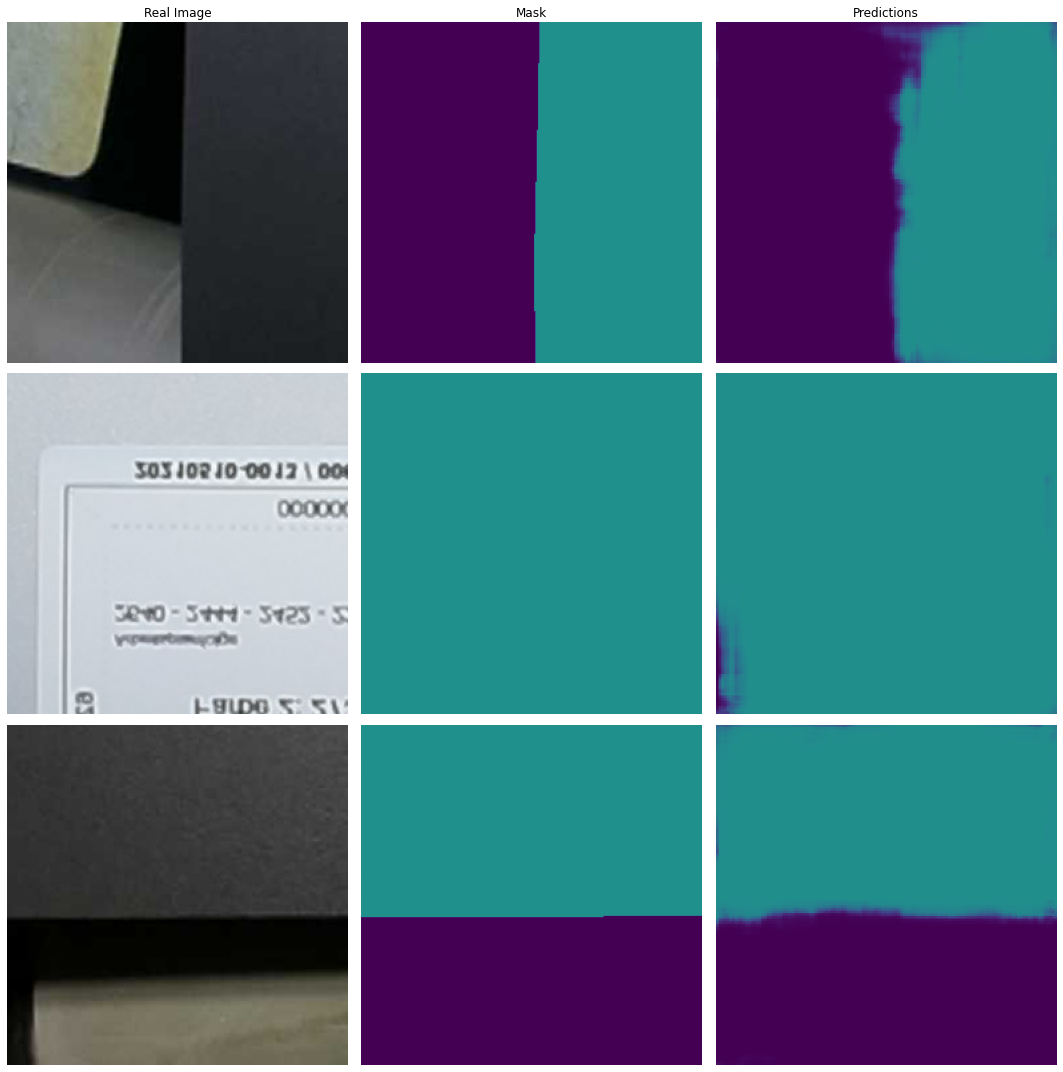

In [14]:
#in 6er batches: batch 2,4,6,7,8
#in 3er batches: batch 4,7,8!(MC)
# fig = train.plot_several_prediction(2, preds_AddTranspose, preds_AddUpsampling, preds_AddDropout, preds_KerasModel)
# fig.savefig("results\samuel\PredictPlot-AllAddedLayersModels_SC_batch2.png")
# fig.savefig("results\samuel\PredictPlot-AllAddedLayersModels_SC_batch2.pdf")

fig = train.plot_prediction(8, preds)
fig.savefig("results\samuel\Predictions_ResNet50V2_nS_SC_100epochs_batch8.png")
fig.savefig("results\samuel\Predictions_ResNet50V2_nS_SC_100epochs_batch8.pdf")

In [38]:
import PIL

Img = PIL.Image.fromarray(preds[2].reshape(256,256))


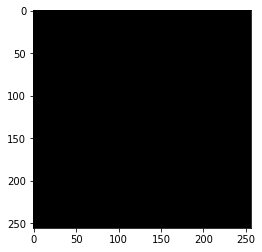

In [39]:
#Img = Img.convert("L")
import matplotlib.pyplot as plt
plt.imshow(Img)
#Img.save("results/TEST.png")